In [1]:
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import hist
import vector
import os
import subprocess
import gc
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import quad
from scipy.interpolate import interp1d
print("uproot version", uproot.__version__)
print("awkward version", ak.__version__)
print("numpy version", np.__version__)
print("matplotlib version", matplotlib.__version__)
print("hist version", hist.__version__)
print("vector version", vector.__version__)
#print("os version", os.__version__)
#print("subprocess version", subprocess.__version__)
#print("gc version", gc.__version__)
print("pandas version", pd.__version__)
#print("scipy.optimize version", scipy.optimize.__version__)
#print("scipy.integrate version", scipy.integrate.__version__)

uproot version 5.0.12
awkward version 2.4.3
numpy version 1.25.2
matplotlib version 3.8.0
hist version 2.7.2
vector version 1.1.1
pandas version 1.5.3


In [2]:
X = [1.5099999999999998, 1.53, 1.55, 1.57, 1.59, 1.6099999999999999, 1.6300000000000001, 1.65, 1.67, 1.69, 1.71, 1.73, 1.75, 1.77, 1.79, 1.81, 1.83, 1.85, 1.87, 1.89, 1.9100000000000001, 1.93, 1.95, 1.97, 1.9900000000000002, 2.0100000000000002, 2.03, 2.05, 2.0700000000000003, 2.09, 2.1100000000000003, 2.13, 2.1500000000000004, 2.17, 2.19, 2.21, 2.23, 2.25, 2.27, 2.29, 2.3099999999999996, 2.33, 2.3499999999999996, 2.37, 2.39, 2.41, 2.43, 2.45, 2.4699999999999998, 2.49, 2.5100000000000002, 2.5300000000000002, 2.55, 2.57, 2.59, 2.61, 2.63, 2.65, 2.67, 2.69, 2.71, 2.73, 2.75, 2.7700000000000005, 2.79, 2.81, 2.83, 2.85, 2.87, 2.89, 2.91, 2.9299999999999997, 2.95, 2.97, 2.99, 3.01, 3.0300000000000002, 3.0500000000000003, 3.07, 3.09, 3.1100000000000003, 3.13, 3.1500000000000004, 3.17, 3.1900000000000004, 3.21, 3.2300000000000004, 3.25, 3.27, 3.29, 3.3099999999999996, 3.3300000000000005, 3.3499999999999996, 3.37, 3.39, 3.41, 3.43, 3.4499999999999997, 3.4699999999999998, 3.49, 3.51, 3.5300000000000002, 3.5500000000000003, 3.5700000000000003, 3.59, 3.61, 3.63, 3.6500000000000004, 3.67, 3.6899999999999995, 3.7100000000000004, 3.7299999999999995, 3.75, 3.77, 3.79, 3.8100000000000005, 3.8299999999999996, 3.8499999999999996, 3.87, 3.8899999999999997, 3.91, 3.93, 3.95, 3.9699999999999998, 3.9899999999999998, 4.01, 4.03, 4.05, 4.07, 4.09, 4.109999999999999, 4.13, 4.15, 4.17, 4.19, 4.21, 4.23, 4.25, 4.2700000000000005, 4.29, 4.31, 4.33, 4.35, 4.37, 4.390000000000001, 4.409999999999999, 4.43, 4.45, 4.47, 4.49, 4.51, 4.53, 4.550000000000001, 4.569999999999999, 4.59, 4.61, 4.63, 4.65, 4.67, 4.6899999999999995, 4.71, 4.7299999999999995, 4.75, 4.7700000000000005, 4.789999999999999, 4.8100000000000005, 4.83, 4.85, 4.87, 4.89, 4.91, 4.930000000000001, 4.95, 4.97, 4.99]

start = X[0] - (X[2] - X[1])/2
stop = X[-1] + (X[2] - X[1])/2
bins = len(X)

In [3]:
# eventsCuts: isCMUL == True
# tracksCuts: -4.0 < eta < -2.5; pt > 0.5; 2° < thetaAbs < 10°
# pairsCuts: -4.0 < rapidity < -2.5; 4 < pT < 5

Y_OS = [794.0, 795.0, 781.0, 814.0, 764.0, 759.0, 771.0, 755.0, 772.0, 778.0, 753.0, 698.0, 738.0, 745.0, 723.0, 754.0, 726.0, 679.0, 668.0, 709.0, 697.0, 640.0, 661.0, 678.0, 629.0, 625.0, 671.0, 620.0, 555.0, 553.0, 585.0, 596.0, 576.0, 575.0, 539.0, 519.0, 595.0, 574.0, 582.0, 532.0, 510.0, 495.0, 516.0, 513.0, 484.0, 454.0, 489.0, 473.0, 467.0, 480.0, 462.0, 452.0, 437.0, 431.0, 454.0, 414.0, 445.0, 446.0, 424.0, 394.0, 433.0, 405.0, 433.0, 448.0, 443.0, 468.0, 499.0, 512.0, 511.0, 590.0, 682.0, 688.0, 856.0, 984.0, 1139.0, 1487.0, 1753.0, 2124.0, 2410.0, 2448.0, 2522.0, 2323.0, 1987.0, 1574.0, 1235.0, 925.0, 651.0, 498.0, 445.0, 392.0, 360.0, 306.0, 250.0, 282.0, 286.0, 270.0, 247.0, 267.0, 247.0, 250.0, 212.0, 210.0, 198.0, 230.0, 247.0, 256.0, 233.0, 286.0, 262.0, 222.0, 267.0, 221.0, 209.0, 216.0, 204.0, 163.0, 191.0, 174.0, 162.0, 172.0, 160.0, 161.0, 146.0, 148.0, 131.0, 136.0, 139.0, 165.0, 145.0, 129.0, 129.0, 138.0, 138.0, 139.0, 140.0, 112.0, 141.0, 125.0, 122.0, 120.0, 130.0, 94.0, 116.0, 111.0, 121.0, 107.0, 108.0, 89.0, 91.0, 102.0, 104.0, 84.0, 81.0, 98.0, 93.0, 76.0, 109.0, 99.0, 86.0, 80.0, 87.0, 92.0, 88.0, 87.0, 83.0, 75.0, 78.0, 83.0, 75.0, 73.0, 79.0, 63.0, 64.0, 78.0, 67.0]

vMass_OS = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_OS.fill(X, weight = Y_OS)

Y_LS = [174.0, 164.0, 165.0, 143.0, 152.0, 189.0, 200.0, 172.0, 159.0, 177.0, 193.0, 182.0, 183.0, 159.0, 163.0, 147.0, 158.0, 152.0, 168.0, 154.0, 151.0, 149.0, 146.0, 145.0, 158.0, 166.0, 160.0, 133.0, 154.0, 163.0, 150.0, 164.0, 153.0, 135.0, 155.0, 145.0, 172.0, 160.0, 133.0, 129.0, 150.0, 147.0, 135.0, 150.0, 131.0, 136.0, 132.0, 122.0, 138.0, 152.0, 140.0, 128.0, 146.0, 142.0, 145.0, 129.0, 125.0, 128.0, 111.0, 126.0, 125.0, 128.0, 127.0, 118.0, 123.0, 127.0, 113.0, 124.0, 133.0, 120.0, 124.0, 128.0, 123.0, 111.0, 114.0, 128.0, 112.0, 119.0, 142.0, 130.0, 114.0, 123.0, 113.0, 123.0, 113.0, 133.0, 108.0, 116.0, 118.0, 126.0, 145.0, 117.0, 136.0, 131.0, 124.0, 124.0, 121.0, 113.0, 109.0, 118.0, 116.0, 119.0, 118.0, 105.0, 118.0, 106.0, 109.0, 117.0, 81.0, 98.0, 106.0, 103.0, 96.0, 97.0, 72.0, 95.0, 96.0, 87.0, 112.0, 79.0, 99.0, 86.0, 70.0, 87.0, 86.0, 71.0, 74.0, 75.0, 77.0, 78.0, 76.0, 74.0, 69.0, 64.0, 73.0, 59.0, 46.0, 50.0, 64.0, 49.0, 70.0, 51.0, 59.0, 47.0, 71.0, 50.0, 56.0, 61.0, 61.0, 55.0, 59.0, 45.0, 73.0, 59.0, 44.0, 59.0, 43.0, 51.0, 45.0, 44.0, 38.0, 41.0, 43.0, 47.0, 38.0, 37.0, 35.0, 36.0, 43.0, 48.0, 39.0, 36.0, 43.0, 35.0, 42.0]

vMass_LS = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_LS.fill(X, weight = Y_LS)

Y_JPsi = [7.0, 4.0, 4.0, 3.0, 4.0, 7.0, 5.0, 7.0, 3.0, 7.0, 6.0, 7.0, 6.0, 11.0, 16.0, 12.0, 6.0, 13.0, 15.0, 13.0, 10.0, 11.0, 18.0, 13.0, 19.0, 18.0, 20.0, 18.0, 20.0, 18.0, 26.0, 17.0, 26.0, 23.0, 26.0, 32.0, 18.0, 36.0, 29.0, 38.0, 35.0, 45.0, 30.0, 39.0, 47.0, 65.0, 48.0, 62.0, 76.0, 73.0, 70.0, 76.0, 104.0, 92.0, 112.0, 110.0, 132.0, 163.0, 154.0, 183.0, 190.0, 215.0, 235.0, 299.0, 288.0, 365.0, 443.0, 525.0, 591.0, 716.0, 911.0, 1082.0, 1414.0, 1739.0, 2243.0, 3060.0, 4111.0, 5208.0, 6353.0, 7101.0, 7418.0, 6828.0, 5644.0, 4027.0, 2488.0, 1546.0, 913.0, 490.0, 281.0, 191.0, 132.0, 92.0, 74.0, 52.0, 36.0, 33.0, 16.0, 25.0, 20.0, 12.0, 11.0, 22.0, 9.0, 9.0, 8.0, 6.0, 8.0, 5.0, 7.0, 5.0, 2.0, 4.0, 10.0, 1.0, 3.0, 6.0, 1.0, 3.0, 3.0, 1.0, 1.0, 1.0, 3.0, 0.0, 0.0, 1.0, 1.0, 2.0, 1.0, 0.0, 1.0, 2.0, 1.0, 0.0, 1.0, 1.0, 0.0, 2.0, 0.0, 2.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]

vMass_JPsi = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_JPsi.fill(X, weight = Y_JPsi)

Y_Psi = [2.0, 0.0, 1.0, 1.0, 1.0, 2.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 3.0, 0.0, 0.0, 2.0, 2.0, 3.0, 4.0, 2.0, 1.0, 2.0, 2.0, 3.0, 2.0, 4.0, 3.0, 1.0, 3.0, 4.0, 4.0, 2.0, 4.0, 2.0, 2.0, 7.0, 10.0, 2.0, 5.0, 9.0, 8.0, 7.0, 10.0, 7.0, 8.0, 7.0, 5.0, 8.0, 8.0, 9.0, 7.0, 16.0, 9.0, 7.0, 11.0, 9.0, 17.0, 12.0, 13.0, 10.0, 23.0, 16.0, 22.0, 15.0, 18.0, 19.0, 15.0, 15.0, 28.0, 23.0, 19.0, 22.0, 34.0, 25.0, 33.0, 34.0, 25.0, 38.0, 29.0, 42.0, 48.0, 51.0, 55.0, 64.0, 56.0, 75.0, 88.0, 87.0, 104.0, 115.0, 163.0, 144.0, 196.0, 184.0, 216.0, 249.0, 312.0, 331.0, 434.0, 530.0, 626.0, 824.0, 990.0, 1338.0, 1733.0, 2205.0, 2692.0, 3135.0, 3428.0, 3413.0, 2986.0, 2287.0, 1628.0, 1074.0, 650.0, 394.0, 233.0, 166.0, 85.0, 64.0, 42.0, 25.0, 29.0, 20.0, 15.0, 12.0, 10.0, 8.0, 3.0, 4.0, 3.0, 8.0, 4.0, 4.0, 4.0, 2.0, 4.0, 2.0, 3.0, 4.0, 2.0, 1.0, 0.0, 0.0, 1.0, 2.0, 1.0, 3.0, 0.0, 2.0, 1.0, 2.0, 0.0, 2.0, 0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

vMass_Psi = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_Psi.fill(X, weight = Y_Psi)

Y_MC = [9.0, 4.0, 5.0, 4.0, 5.0, 9.0, 5.0, 8.0, 3.0, 8.0, 7.0, 7.0, 6.0, 14.0, 16.0, 12.0, 8.0, 15.0, 18.0, 17.0, 12.0, 12.0, 20.0, 15.0, 22.0, 20.0, 24.0, 21.0, 21.0, 21.0, 30.0, 21.0, 28.0, 27.0, 28.0, 34.0, 25.0, 46.0, 31.0, 43.0, 44.0, 53.0, 37.0, 49.0, 54.0, 73.0, 55.0, 67.0, 84.0, 81.0, 79.0, 83.0, 120.0, 101.0, 119.0, 121.0, 141.0, 180.0, 166.0, 196.0, 200.0, 238.0, 251.0, 321.0, 303.0, 383.0, 462.0, 540.0, 606.0, 744.0, 934.0, 1101.0, 1436.0, 1773.0, 2268.0, 3093.0, 4145.0, 5233.0, 6391.0, 7130.0, 7460.0, 6876.0, 5695.0, 4082.0, 2552.0, 1602.0, 988.0, 578.0, 368.0, 295.0, 247.0, 255.0, 218.0, 248.0, 220.0, 249.0, 265.0, 337.0, 351.0, 446.0, 541.0, 648.0, 833.0, 999.0, 1346.0, 1739.0, 2213.0, 2697.0, 3142.0, 3433.0, 3415.0, 2990.0, 2297.0, 1629.0, 1077.0, 656.0, 395.0, 236.0, 169.0, 86.0, 65.0, 43.0, 28.0, 29.0, 20.0, 16.0, 13.0, 12.0, 9.0, 3.0, 5.0, 5.0, 9.0, 4.0, 5.0, 5.0, 2.0, 6.0, 2.0, 5.0, 4.0, 2.0, 3.0, 1.0, 0.0, 1.0, 2.0, 4.0, 3.0, 0.0, 3.0, 1.0, 2.0, 0.0, 2.0, 0.0, 0.0, 1.0, 2.0, 1.0, 2.0, 0.0, 2.0, 0.0, 1.0, 1.0, 1.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]

vMass_MC = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_MC.fill(X, weight = Y_MC)

Hist(Regular(175, 1.5, 5, name='$m_{\\mu \\mu}$', label='X'), storage=Double()) # Sum: 104338.0

In [4]:
def CB2(x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )

    return np.piecewise(x, 
                        [( x - mu )/sig < -1 * alphaL, (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , ( x - mu )/sig > alphaR],
                        [lambda x: N * AL * (BL - (( x - mu )/sig))**(-nL), lambda x: N * np.exp(-1 * (( x - mu )/sig)**2 / 2), lambda x: N * AR * (BR + ( x - mu )/sig)**(-nR)])

def NA60(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
    return np.piecewise(x, 
                        [(x - mu)/sig < alphaL, 
                         ((x - mu)/sig >= alphaL) & ((x - mu)/sig <= alphaR).any() , 
                         (x - mu)/sig > alphaR],
                        [lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1L * (alphaL - (x - mu)/sig)**(p2L - p3L * np.sqrt(alphaL - (x - mu)/sig)))**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1R * ((x - mu)/sig - alphaR)**(p2R - p3R * np.sqrt((x - mu)/sig - alphaR)))**2)])

def VWG(x, N, mu, alpha, beta):
    sigma = alpha + beta*((x-mu)/mu)
    return N * np.exp(-(x - mu)**2 / (2*sigma**2))

def PR(x, N, a1, b1, b2):
    return N * (1 + a1*x) / (b1*x + b2*x)

def DE(x, N, alpha, beta1, beta2):
    return N * (np.exp(beta1*x) + alpha * np.exp(beta2*x))

def test(x, y1, y2, y3, y4, y5):
    x0 = [1.5, 2.5, 3.45, 3.8, 5]
    return interp1d([*x0], [y1, y2, y3, y4, y5], kind = 'cubic', bounds_error = False, fill_value = "extrapolate")(x)

def test2(x, y1, y2, y3, y4, y5):
    return np.exp(test(x, y1, y2, y3, y4, y5))

In [5]:
def fixedFunc_JPsi(x, N1, mu1, sig1):
    return func_JPsi(x, N1, mu1, sig1, alphaL1, nL1, alphaR1, nR1)

def fixedFunc_Psi(x, N2, mu2, sig2):
    return func_Psi(x, N2, mu2, sig2, alphaL2, nL2, alphaR2, nR2)

def fixedFunc_MC(x, N1, mu1, sig1, N2, mu2, sig2):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2)

def fixedFunc_bckg(x, y1, y2, y3, y4, y5):
    return func_bckg(x, y1, y2, y3, y4, y5)

def fixedFitFunc(x,
                 N1, mu1, sig1,
                 N2, mu2, sig2,
                y1, y2, y3, y4, y5):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2) + fixedFunc_bckg(x, y1, y2, y3, y4, y5)

condition_x_range = lambda x_data: (x_data < 5.0)
func_JPsi = CB2
func_Psi = CB2
func_bckg = test2
func_MC = fixedFunc_MC
func = fixedFitFunc

In [6]:
x_data = np.array(X)
y_data = np.array(vMass_JPsi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

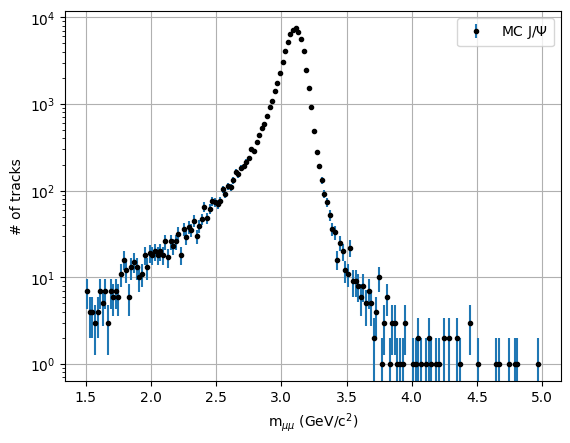

In [7]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [8]:
p0_JPsi = np.array([136241.85680339273, 3.1003675365856544, 0.0630318569252801, 0.993869592186634, 3.0340276033125493, 2.233482641523906, 2.705629560440874])

In [9]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_JPsi, pcov_JPsi, nfev_JPsi, fvec_JPsi, fjac_JPsi = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_JPsi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_JPsi))
print("pcov: \n", pcov_JPsi)
print("residual: \n", nfev_JPsi)

popt: 
 [7414.0080089640405, 3.100629819741313, 0.06250147047421742, 1.0264619709028233, 3.043625754990282, 2.096191474434469, 2.8726460134291845]
pcov: 
 [[ 2.38324941e+03  5.66910540e-03 -1.37842882e-02 -9.01606725e-02
   1.00078123e-02 -3.74210664e-01  8.78620255e-01]
 [ 5.66910540e-03  2.24169659e-07 -1.19932294e-07 -4.37537829e-06
   1.22908103e-05 -1.46185780e-06  2.85475391e-07]
 [-1.37842882e-02 -1.19932294e-07  1.99684189e-07  4.15526780e-06
  -8.65224056e-06  7.17798745e-06 -1.56653670e-05]
 [-9.01606725e-02 -4.37537829e-06  4.15526780e-06  2.40070088e-04
  -9.01633826e-04  1.34339257e-04 -2.55858722e-04]
 [ 1.00078123e-02  1.22908103e-05 -8.65224056e-06 -9.01633826e-04
   4.88018790e-03 -2.35276553e-04  3.73952390e-04]
 [-3.74210664e-01 -1.46185780e-06  7.17798745e-06  1.34339257e-04
  -2.35276553e-04  1.70289750e-03 -6.39714695e-03]
 [ 8.78620255e-01  2.85475391e-07 -1.56653670e-05 -2.55858722e-04
   3.73952390e-04 -6.39714695e-03  3.25657155e-02]]
residual: 
 {'nfev': 6, '

fit error : 48.818938982936935


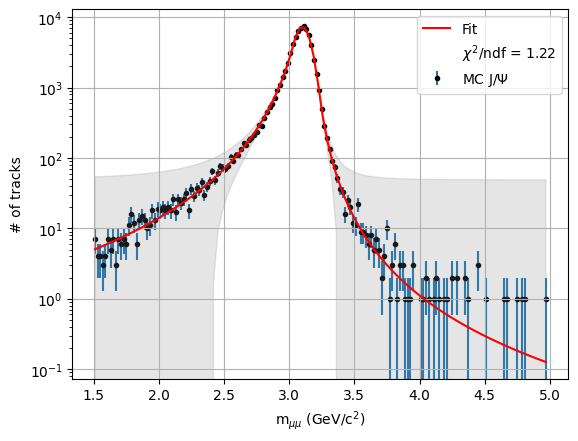

In [10]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_JPsi(x_fit, *popt_JPsi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_JPsi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_JPsi(x_data, *popt_JPsi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_JPsi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

/tmp/ipykernel_13729/2642993752.py:1: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(nfev_JPsi["fvec"]**2/(nfev_JPsi["nfev"]-len(popt_JPsi)))


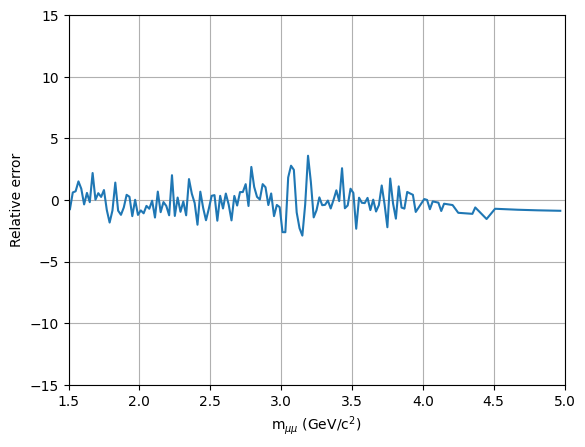

In [11]:
err = np.sqrt(nfev_JPsi["fvec"]**2/(nfev_JPsi["nfev"]-len(popt_JPsi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_JPsi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [12]:
x_data = np.array(X)
y_data = np.array(vMass_Psi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

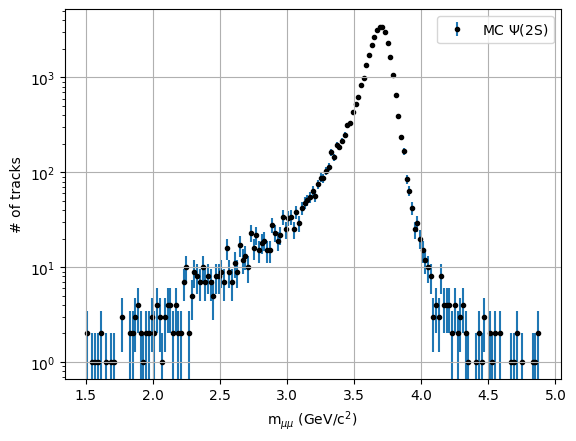

In [13]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [14]:
p0_Psi = np.array([67449.51297432544, 3.693248662583962, 0.06511527893660865, 0.9607870324016564, 2.849198115287005, 2.283717751711943, 2.5497581009488974])

In [15]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_Psi, pcov_Psi, nfev_Psi, fvec_Psi, fjac_Psi = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_Psi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_Psi))
print("pcov: \n", pcov_Psi)
print("residual: \n", nfev_Psi)

popt: 
 [3427.948246431606, 3.691441984220598, 0.06561920713563497, 0.9916329979493852, 3.0485865280940696, 2.009828650846971, 3.467369166032584]
pcov: 
 [[ 8.50986639e+02  4.67388051e-03 -1.20286626e-02 -7.79471191e-02
   6.05016332e-03 -3.97750874e-01  1.35053310e+00]
 [ 4.67388051e-03  4.03649554e-07 -2.22961523e-07 -6.98941013e-06
   1.85318485e-05 -2.78794345e-06 -6.06900197e-09]
 [-1.20286626e-02 -2.22961523e-07  4.04112135e-07  7.25333050e-06
  -1.35730225e-05  1.70245792e-05 -5.62500789e-05]
 [-7.79471191e-02 -6.98941013e-06  7.25333050e-06  3.43313223e-04
  -1.22428254e-03  2.73164897e-04 -8.11293821e-04]
 [ 6.05016332e-03  1.85318485e-05 -1.35730225e-05 -1.22428254e-03
   6.54060383e-03 -4.15759837e-04  1.02979465e-03]
 [-3.97750874e-01 -2.78794345e-06  1.70245792e-05  2.73164897e-04
  -4.15759837e-04  3.58227661e-03 -1.93713504e-02]
 [ 1.35053310e+00 -6.06900197e-09 -5.62500789e-05 -8.11293821e-04
   1.02979465e-03 -1.93713504e-02  1.36222958e-01]]
residual: 
 {'nfev': 12, '

fit error : 29.174189430083


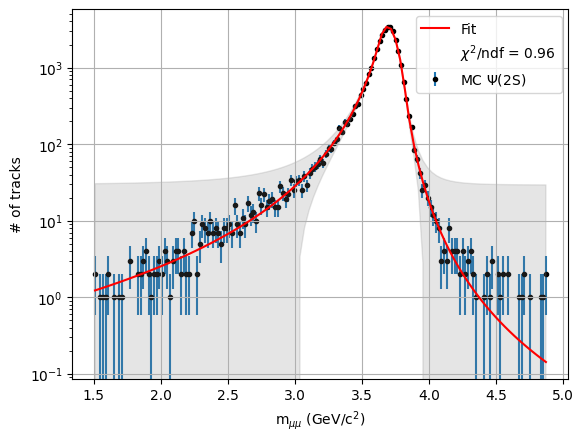

In [16]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_Psi(x_fit, *popt_Psi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_Psi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_Psi(x_data, *popt_Psi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_Psi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

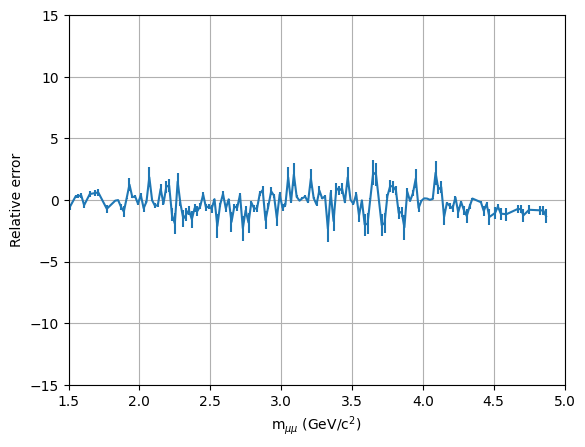

In [17]:
err = np.sqrt(nfev_Psi["fvec"]**2/(nfev_Psi["nfev"]-len(popt_Psi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_Psi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [18]:
x_data = np.array(X)
y_data = np.array(vMass_MC)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

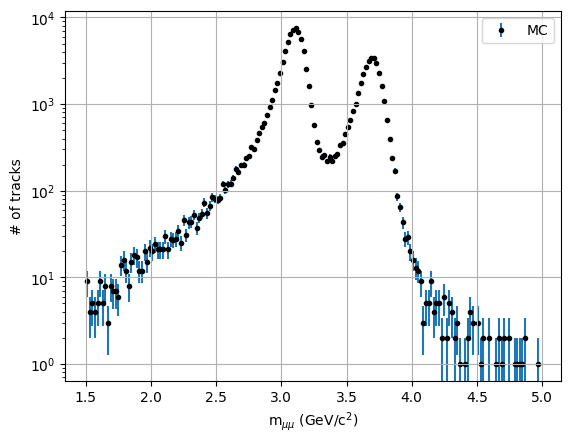

In [19]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [20]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
nL1 = popt_JPsi[4]
alphaR1= popt_JPsi[5]
nR1 = popt_JPsi[6]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
nL2 = popt_Psi[4]
alphaR2 = popt_Psi[5]
nR2 = popt_Psi[6]

p0_MC = np.array([N1, mu1, sig1, N2, mu2, sig2])

In [21]:
def mklb(p0, var):
    return p0*(1-np.sign(p0)*var)

def mkub(p0, var):
    return p0*(1+np.sign(p0)*var)

varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0_MC[:3],varpks), *mklb(p0_MC[3:6],varpks)])
ub = np.array([*mkub(p0_MC[:3],varpks), *mkub(p0_MC[3:6],varpks)])
bounds = (lb,ub)

In [22]:
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, method = 'trf', full_output = True)
popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_MC))
print("pcov: \n", pcov_MC)
print("residual: \n", nfev_MC)

popt: 
 [7406.34811336128, 3.100526032809008, 0.06260307047615633, 3428.372520862898, 3.6914110890052223, 0.0656828238509866]
pcov: 
 [[ 2.52393587e+03  3.77551129e-03 -1.16280647e-02 -9.88765420e+00
  -3.99836511e-04  5.63279899e-04]
 [ 3.77551129e-03  1.50287519e-07 -3.16287271e-08  2.55209808e-05
   2.01043443e-09 -1.97307719e-09]
 [-1.16280647e-02 -3.16287271e-08  1.03215996e-07  3.01168199e-04
   9.77036807e-09 -1.49865818e-08]
 [-9.88765420e+00  2.55209808e-05  3.01168199e-04  1.11455457e+03
   4.36490099e-03 -1.20597752e-02]
 [-3.99836511e-04  2.01043443e-09  9.77036807e-09  4.36490099e-03
   3.53500728e-07 -9.73662351e-08]
 [ 5.63279899e-04 -1.97307719e-09 -1.49865818e-08 -1.20597752e-02
  -9.73662351e-08  2.53791318e-07]]
residual: 
 {'nfev': 4, 'fvec': array([-0.90277611,  1.25445479,  0.77652055,  1.48730614,  0.99475693,
       -0.5045824 ,  1.23479956,  0.01756738,  3.09050268,  0.2374822 ,
        0.75860864,  0.89206319,  1.52364674, -1.03581881, -1.36548274,
       -0.2

fit error : 60.319900863491824


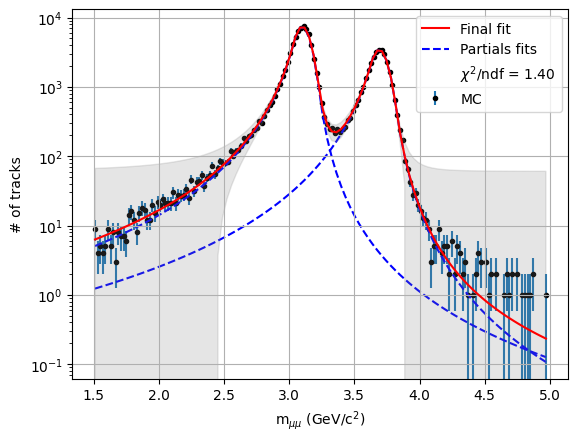

In [23]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_MC(x_fit, *popt_MC)
plt.plot(x_fit, y_fit, '-r', label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt_MC[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt_MC[3:6]), '--b', zorder = 1)

sigmas = np.diag(pcov_MC)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_MC(x_data, *popt_MC)) / y_error) ** 2)
ndf = len(x_data) + len(popt_MC) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

/tmp/ipykernel_13729/4254452161.py:1: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))


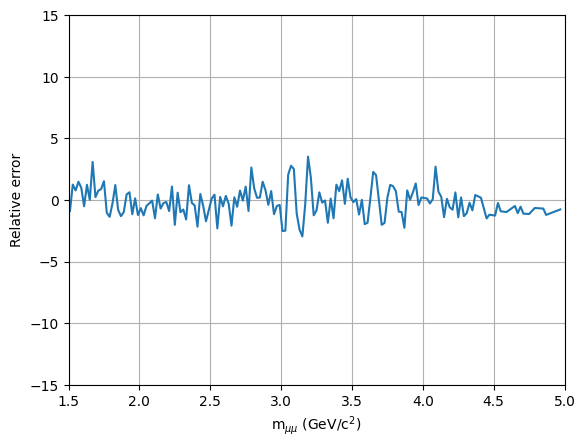

In [24]:
err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_MC["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [25]:
x_data = np.array(X)
y_data = np.array(vMass_LS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

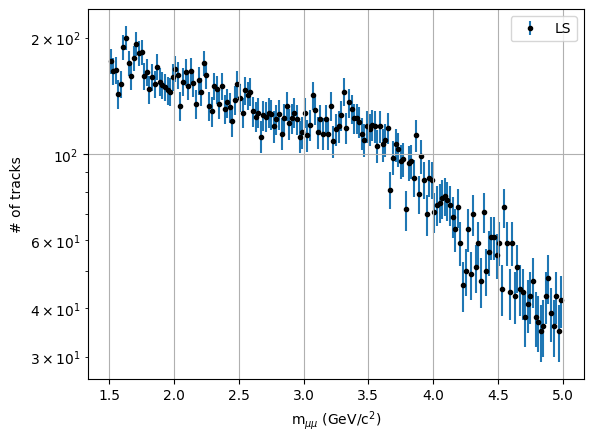

In [26]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [27]:
p0_bckg = np.array([1,1,1,1,1])

In [28]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_bckg, pcov_bckg, nfev_bckg, fvec_bckg, fjac_bckg = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_bckg, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_bckg))
print("pcov: \n", pcov_bckg)
print("residual: \n", nfev_bckg)

popt: 
 [5.208248987626801, 4.918627396039137, 4.704171465058229, 4.507168563978476, 3.569441811937184]
pcov: 
 [[ 8.11691782e-04 -1.41039826e-04  1.15182984e-04  5.25156510e-05
   2.22811960e-04]
 [-1.41039826e-04  1.62359648e-04  3.24019698e-06 -1.77305458e-05
  -5.83999452e-06]
 [ 1.15182984e-04  3.24019698e-06  2.20702797e-04  1.56404557e-04
   6.43514895e-05]
 [ 5.25156510e-05 -1.77305458e-05  1.56404557e-04  2.24777424e-04
  -2.93872810e-04]
 [ 2.22811960e-04 -5.83999452e-06  6.43514895e-05 -2.93872810e-04
   3.65566308e-03]]
residual: 
 {'nfev': 17, 'fvec': array([ 0.58416463,  1.22087551,  0.98465582,  2.73803341,  1.77742021,
       -1.22499002, -2.08765408, -0.23931082,  0.65922379, -0.83984641,
       -2.05858844, -1.40586106, -1.57288401,  0.11614369, -0.29309234,
        0.91559132, -0.08025141,  0.31852486, -1.01018855, -0.00582282,
        0.16187558,  0.25306528,  0.43249149,  0.44826927, -0.66797155,
       -1.33172705, -0.93991147,  1.24946324, -0.58533247, -1.3245136

fit error : 0.07124040094887091


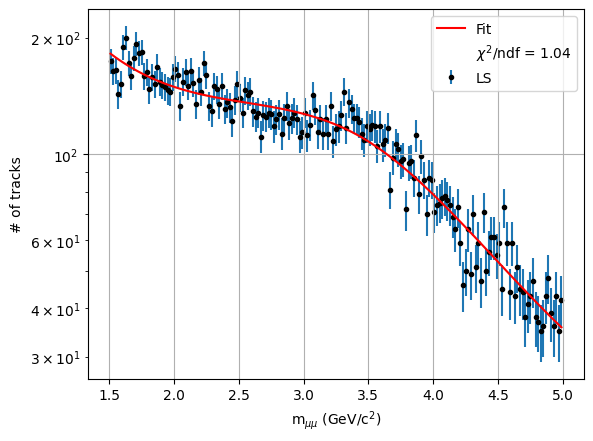

In [29]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_bckg(x_fit, *popt_bckg)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_bckg)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_bckg(x_data, *popt_bckg)) / y_error) ** 2)
ndf = len(x_data) + len(popt_bckg) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

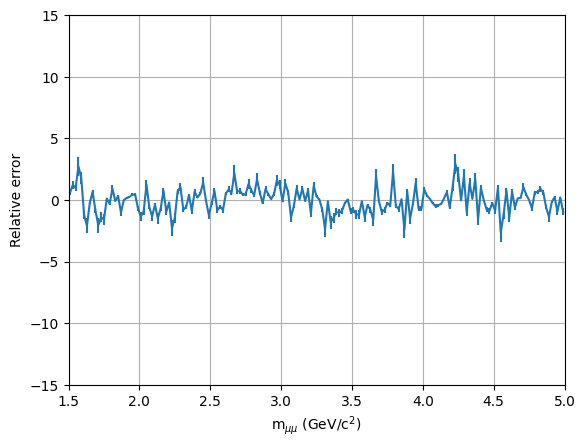

In [30]:
err = np.sqrt(nfev_bckg["fvec"]**2/(nfev_bckg["nfev"]-len(popt_bckg)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_bckg["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [31]:
x_data = np.array(X)
y_data = np.array(vMass_OS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

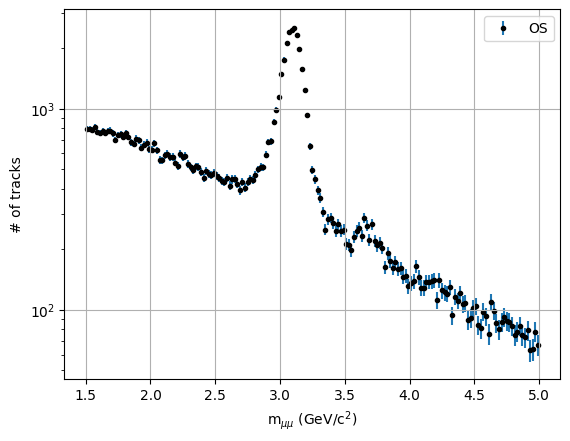

In [32]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [33]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
nL1 = popt_JPsi[4]
alphaR1 = popt_JPsi[5]
nR1 = popt_JPsi[6]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
nL2 = popt_Psi[4]
alphaR2 = popt_Psi[5]
nR2 = popt_Psi[6]

y1 = popt_bckg[0]
y2 = popt_bckg[1]
y3 = popt_bckg[2]
y4 = popt_bckg[3]
y5 = popt_bckg[4]

p0 = np.array([N1, mu1, sig1, N2, mu2, sig2,  y1, y2, y3, y4, y5])

In [34]:
varbg = np.ones(np.shape(p0[6:]))*1# bg parameters variation factor around p0
varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0[:3],varpks), *mklb(p0[3:6],varpks), *mklb(p0[6:],varbg)])
ub = np.array([*mkub(p0[:3],varpks), *mkub(p0[3:6],varpks), *mkub(p0[6:],varbg)])
bounds = (lb,ub)

In [35]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, method = 'trf', full_output = True)
popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt))
print("pcov: \n", pcov)
print("residual: \n", nfev)

popt: 
 [2303.335996192804, 3.09860783658902, 0.06875161752163915, 70.48194593844896, 3.6722512505421667, 0.0721811278491832, 6.721991547474377, 6.082518111179076, 5.381888613971844, 5.133703686576964, 4.1802412496576835]
pcov: 
 [[ 8.92022275e+02  3.95353275e-03 -1.62407756e-02  3.60201460e+00
  -6.74279865e-03  1.37188209e-02 -1.43665081e-02 -1.29721985e-03
  -3.52707160e-02 -2.24513715e-02 -1.85677794e-02]
 [ 3.95353275e-03  7.95528352e-07 -2.50961838e-07 -2.02549044e-04
   4.16394851e-07 -8.52933549e-07  1.62201006e-08  1.61858853e-06
   2.74062700e-06  1.41834387e-06  1.90846153e-06]
 [-1.62407756e-02 -2.50961838e-07  9.41335971e-07  1.24866497e-03
  -1.12432088e-06  2.64812167e-06 -2.06517654e-06 -4.48755437e-06
  -1.16737761e-05 -7.07617074e-06 -5.76528355e-06]
 [ 3.60201460e+00 -2.02549044e-04  1.24866497e-03  1.04756594e+02
   6.65394481e-03 -5.84598300e-02 -1.68672269e-02 -1.23456395e-02
  -6.35702032e-02 -5.19382219e-02  8.78157634e-03]
 [-6.74279865e-03  4.16394851e-07 -1.1

fit error : 31.571879349148926


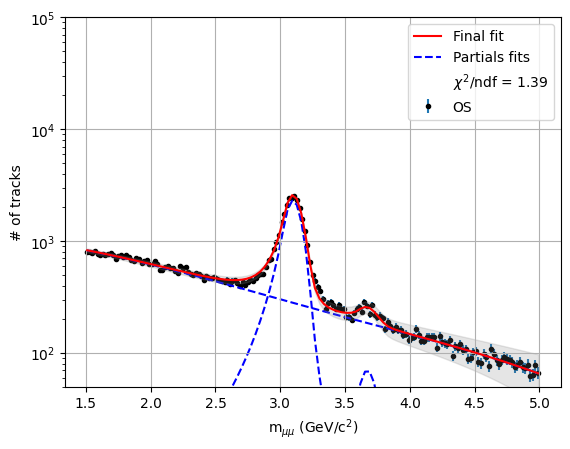

In [36]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func(x_fit, *popt)
plt.plot(x_fit, y_fit, '-r', zorder = 2, label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt[3:6]), '--b', zorder = 1)
plt.plot(x_fit, fixedFunc_bckg(x_fit, *popt[6:]), '--b', zorder = 1)

sigmas = np.absolute(np.diag(pcov))
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func(x_data, *popt)) / y_error) ** 2)
ndf = len(x_data) + len(popt) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.legend()
plt.yscale('log')
plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.ylim(50, 100000)
plt.grid(True)

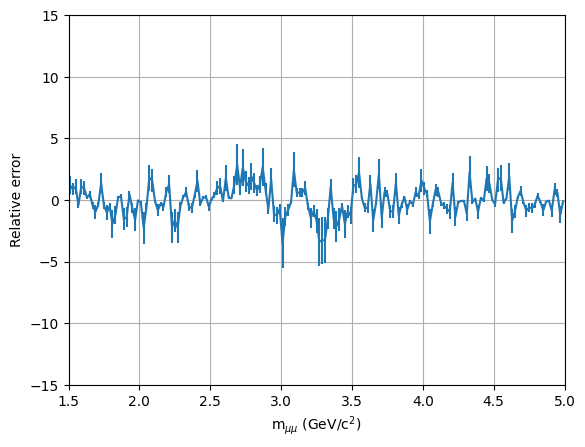

In [37]:
err = np.sqrt(nfev["fvec"]**2/(nfev["nfev"]-len(popt)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [38]:
def dCB2(pcov, x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )
    
    def dCB2dx(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: AL*N*nL/(sig*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: -N*(-2*mu + 2*x)*np.exp(-(-mu + x)**2/(2*sig**2))/(2*sig**2), 
                             lambda x: -AR*N*nR/(sig*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])
    
    def dCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: AL/(BL - (-mu + x)/sig)**nL, 
                             lambda x: np.exp(-(-mu + x)**2/(2*sig**2)), 
                             lambda x: AR/(BR + (-mu + x)/sig)**nR])

    def dCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: -AL*N*nL/(sig*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: -N*(2*mu - 2*x)*np.exp(-(-mu + x)**2/(2*sig**2))/(2*sig**2), 
                             lambda x: AR*N*nR/(sig*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])

    def dCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: -AL*N*nL*(-mu + x)/(sig**2*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: N*(-mu + x)**2*np.exp(-(-mu + x)**2/(2*sig**2))/sig**3, 
                             lambda x: AR*N*nR*(-mu + x)/(sig**2*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])
    
    def IdCB2dx(x, *args):
        return quad(dCB2dx, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dN(x, *args):
        return quad(dCB2dN, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dmu(x, *args):
        return quad(dCB2dmu, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dsig(x, *args):
        return quad(dCB2dsig, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    return np.sqrt(IdCB2dx(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * (((stop - start)/bins)/2)**2 \
                   + IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[0, 0] \
                   + IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[1, 1] \
                   + IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[2, 2] \
                   + 2 * IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[0, 1])) \
                   + 2 * IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[1, 2])) \
                   + 2 * IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[2, 1])))

N_JPsi = quad(fixedFunc_JPsi, start, stop, args = (*popt[:3], ))[0] / ((stop - start)/bins)
err_JPsi = dCB2(pcov[:3, :3], x_data, *popt[:3], *popt_JPsi[3:])
print(r"N_JPsi = ", N_JPsi, " +/- ", err_JPsi, "(stat.)")

N_JPsi =  23805.466125571795  +/-  494.1798254559797 (stat.)
